In [0]:
import pandas as pd
import numpy as np

# 删除Null

In [0]:
df = pd.read_csv("/content/drive/My Drive/data_analysis/train.csv")

In [0]:
df.head()

,ID,Age,Employment_class,Fnlwgt,Education_level,Education_years,Marital_status,Occupation,Relationship_status,Race,Sex,Capital_gain,Capital_loss,hours,Native_country,Salary
0,40947,50,Private,104729,HS-grad,9,Divorced,Machine-op-inspct,Other-relative,White,Female,0,0,48,United-States,<=50K
1,17139,27,Private,138705,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,53,United-States,<=50K
2,29557,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
3,10344,40,Private,181015,HS-grad,9,Separated,Other-service,Unmarried,White,Female,0,0,47,United-States,<=50K
4,33206,52,Private,110563,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K


In [0]:
#mplist1中存储Employment_class的空值 ； list2中存储'Occupation'的空值
list1 = []
list2 = []
k1 = 0
k2 = 0
for i in df['Employment_class']:
  if i == ' ?':
    list1.append(k1)
  k1=k1+1
for i in df['Occupation']:
  if i == ' ?':
    list2.append(k2)
  k2=k2+1

In [0]:
#查看list1和list2的关系，发现list1的元素全都在list2中~
list = []
for i in list1:
  for j in list2:
    if i == j:
      list.append(i)
    else:
      pass

In [0]:
for i in list2:
  df = df.drop(i)

In [0]:
a = ['Marital_status','Occupation','Relationship_status']

# 使用get_dummies函数，生成one_hot编码

In [0]:
# one hot encoding
for i in a:
  print(i)  
  a1 = pd.get_dummies(df[i])
  df = df.join(a1)#append this column to df
df.head()

Marital_status
Occupation
Relationship_status


,ID,Age,Employment_class,Fnlwgt,Education_level,Education_years,Marital_status,Occupation,Relationship_status,Race,Sex,Capital_gain,Capital_loss,hours,Native_country,Salary,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,40947,50,Private,104729,HS-grad,9,Divorced,Machine-op-inspct,Other-relative,White,Female,0,0,48,United-States,<=50K,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,17139,27,Private,138705,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,53,United-States,<=50K,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,29557,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,10344,40,Private,181015,HS-grad,9,Separated,Other-service,Unmarried,White,Female,0,0,47,United-States,<=50K,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,33206,52,Private,110563,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [0]:
df = pd.read_csv('new.csv')

# label转换为1或者0


In [0]:
label_mapping = {' <=50K':0,' >50K':1}
df['label_Salary'] = df['Salary'].map(label_mapping)

In [0]:
df.head()

,label_Salary,Employment_class,Education_level,Education_years,Marital_status,Occupation,Relationship_status,Race,Sex,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,scaled_Fnlwgt,scaled_ages,scaled_hours,label_Employment_class,label_Education_level,label_Marital_status,label_Occupation,label_Relationship_status,label_Race,label_Sex
0,0,Private,HS-grad,9,Divorced,Machine-op-inspct,Other-relative,White,Female,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0.063094,0.452055,0.479592,0,0,0,0,0,0,0
1,0,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.086661,0.136986,0.530612,0,0,1,1,1,0,1
2,0,Private,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0.090745,0.178082,0.397959,0,0,2,2,2,1,1
3,0,Private,HS-grad,9,Separated,Other-service,Unmarried,White,Female,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.116009,0.315068,0.469388,0,0,3,2,3,0,0
4,1,Private,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.067140,0.479452,0.397959,0,1,1,3,1,0,1


In [0]:
df.to_csv('new.csv')

In [0]:
df = pd.read_csv('/content/drive/My Drive/data_analysis/最新数据.csv')

In [0]:
label_mapping = {' Female':0, ' Male':1}
df['label_Sex'] = df['Sex'].map(label_mapping)

In [0]:
df['Sex'].unique()

array([' Female', ' Male'], dtype=object)

In [0]:
df.head()

,label_Salary,Employment_class,Education_level,Education_years,Marital_status,Occupation,Relationship_status,Race,Sex,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,scaled_Fnlwgt,scaled_ages,scaled_hours,label_Employment_class,label_Education_level,label_Marital_status,label_Occupation,label_Relationship_status,label_Race,label_Sex
0,0,Private,HS-grad,9,Divorced,Machine-op-inspct,Other-relative,White,Female,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0.063094,0.452055,0.479592,0,0,0,0,0,0,0
1,0,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.086661,0.136986,0.530612,0,0,1,1,1,0,1
2,0,Private,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0.090745,0.178082,0.397959,0,0,2,2,2,1,1
3,0,Private,HS-grad,9,Separated,Other-service,Unmarried,White,Female,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.116009,0.315068,0.469388,0,0,3,2,3,0,0
4,1,Private,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.067140,0.479452,0.397959,0,1,1,3,1,0,1


# 将数值压缩到0-1之间

In [0]:
#data0为第1列数据（age）,data1为第3列，data2为第11列，将数据压缩至0~1之间
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data0 = scaler.fit_transform(df.values[:,0].reshape(-1,1))
data1 = scaler.fit_transform(df.values[:,2].reshape(-1,1))
data2 = scaler.fit_transform(df.values[:,10].reshape(-1,1))

In [0]:
kk = pd.DataFrame(data1,columns=['scaled_Fnlwgt'])
oo = pd.DataFrame(data2,columns=['scaled_hours'])
aa = pd.DataFrame(data0,columns=['scaled_ages'])

In [0]:
kk =kk.join(oo)
kk = kk.join(aa)
kk

In [0]:
df = df.join(kk)

In [0]:
#存入数据
df.to_csv('/content/drive/My Drive/data_analysis/to_numeric.csv')

In [0]:
for  i  in ['Employment_class','Education_level','Marital_status','Occupation','Relationship_status','Race','Sex']:
  k = 'to_string_' + i
  df[k] = pd.to_numeric(df[i],'coerce')
  df = df.drop(columns=[k])

In [0]:
# pd.to_numeric(df['Employment_class'].astype(float))
df['Employment_class'].unique()

array([' Private', ' Self-emp-inc', ' Federal-gov', ' Local-gov',
       ' Self-emp-not-inc', ' State-gov', ' Without-pay'], dtype=object)

# train_test split

In [0]:
import pandas as pd
import numpy as np

In [0]:
df = pd.read_csv('/content/drive/My Drive/data_analysis/to_numeric.csv')

In [0]:
df = df.drop(columns =['Unnamed: 0'])

In [4]:
df.head()

,label_Salary,Employment_class,Education_level,Education_years,Marital_status,Occupation,Relationship_status,Race,Sex,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,scaled_Fnlwgt,scaled_ages,scaled_hours,label_Employment_class,label_Education_level,label_Marital_status,label_Occupation,label_Relationship_status,label_Race,label_Sex
0,0,Private,HS-grad,9,Divorced,Machine-op-inspct,Other-relative,White,Female,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0.063094,0.452055,0.479592,0,0,0,0,0,0,0
1,0,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.086661,0.136986,0.530612,0,0,1,1,1,0,1
2,0,Private,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0.090745,0.178082,0.397959,0,0,2,2,2,1,1
3,0,Private,HS-grad,9,Separated,Other-service,Unmarried,White,Female,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.116009,0.315068,0.469388,0,0,3,2,3,0,0
4,1,Private,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.067140,0.479452,0.397959,0,1,1,3,1,0,1


In [92]:
y = df.values[:,0]
X = df.values[:,9:]
y=y.astype('int')
X.shape, y.shape

((35796, 37), (35796,))

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# deep learning neural network (68% ——>73% ——> 65%) 
**1.避免过度拟合，添加了activity_regularizer和dropout层**

**2.网络主体由全连接（dense layer）**

**3.通过调参(激活函数/batch_size/learning_rate)，选择最优模型**

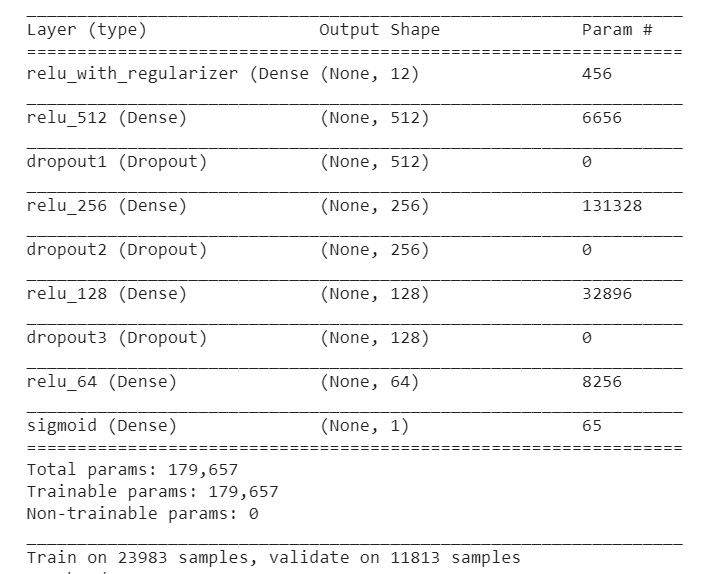
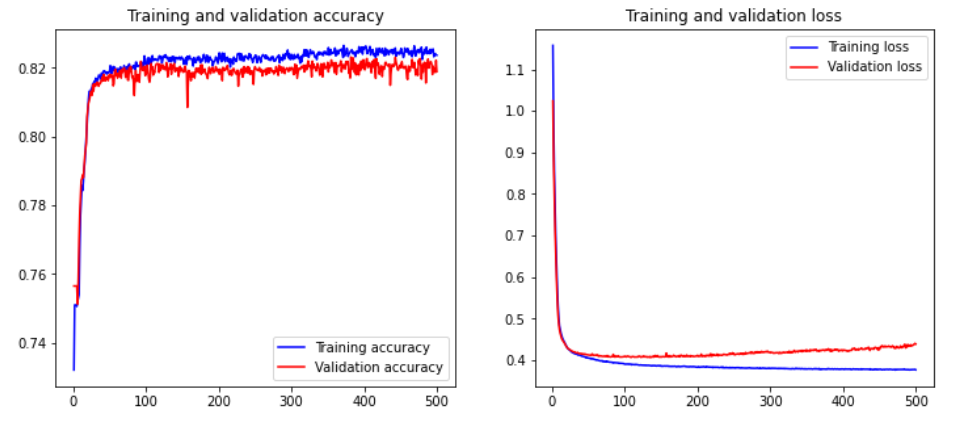

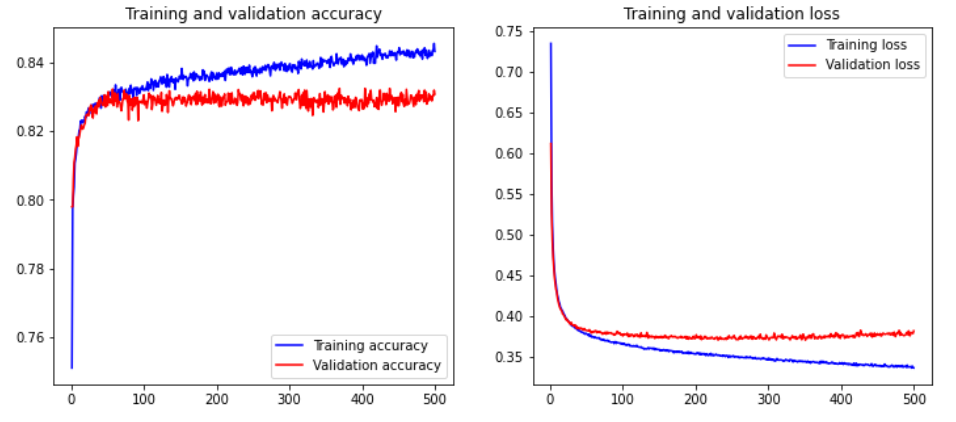


In [0]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras
from keras.regularizers import l1
import matplotlib.pyplot as plt
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training accuracy')
    plt.plot(x, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    # plt.show()
model = Sequential()
model.add(Dense(12, input_dim=37, activation='relu',activity_regularizer=l1(0.01),name='relu_with_regularizer'))
model.add(Dense(512,activation ='relu',name='relu_512'))
model.add(Dropout(0.1,name='dropout1'))
model.add(Dense(256, activation='relu',name='relu_256'))
model.add(Dropout(0.1,name='dropout2'))
model.add(Dense(128, activation='relu',name='relu_128'))
model.add(Dropout(0.2,name='dropout3'))
model.add(Dense(64,activation ='relu',name='relu_64'))
model.add(Dense(1, activation='sigmoid',name='sigmoid'))
model.summary()
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer=optimiser, metrics=['accuracy'])
# fit the keras model on the dataset
history = model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=1000, batch_size=10)
plot_history(history)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
relu_with_regularizer (Dense (None, 12)                456       
_________________________________________________________________
relu_512 (Dense)             (None, 512)               6656      
_________________________________________________________________
dropout1 (Dropout)           (None, 512)               0         
_________________________________________________________________
relu_256 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout2 (Dropout)           (None, 256)               0         
_________________________________________________________________
relu_128 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout3 (Dropout)           (None, 128)             

In [0]:
# evaluate the keras model
accuracy = model.evaluate(X_test, y_test)
accuracy

11813/11813 [==============================] - 0s 21us/step


[0.3514368381405789, 0.8355202078819275]

In [0]:
# make a prediction
ynew = model.predict(x)
# show the inputs and predicted outputs
print("X=%s, Predicted=%s" % (x[100], ynew[100]))

X=[0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0.7040816326530611
 0.1974879183942448 0.5342465753424657 2 1 3 7 3 0 0], Predicted=[0.06321064]


# 打印confusion_matrix
对比各个模型的F1_score的值

```
model1
[1.         1.78589295]
[[8029  908]
 [1091 1785]]
```




In [88]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict_classes(X_test)
mt = confusion_matrix(y_test, y_pred)
Predicision = mt[1,1]/(mt[1,1],mt[0,1])
Recall = mt[1,1]/(mt[1,1],mt[1,0])
F1_score = 2*Predicision*Recall/(Predicision+Recall)
print(F1_score)
print(mt)

[ 1. nan]
[[8937    0]
 [2873    3]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


# Logestic Regression (79%)

In [7]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=1).fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
ynew = clf.predict_proba(x)

In [12]:
ynew

array([[0.99107835, 0.00892165],
       [0.9500462 , 0.0499538 ],
       [0.92461265, 0.07538735],
       ...,
       [0.99593805, 0.00406195],
       [0.96537654, 0.03462346],
       [0.81950093, 0.18049907]])

# K-nearest neighbors (65%)


In [30]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X, y) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [0]:
ynew = neigh.predict_proba(x)

# decision tree(无法打印概率)

In [0]:
from sklearn.datasets import load_iris
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [0]:
tree.plot_tree(clf) 

In [43]:
clf.predict_proba(x)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

# 预测
**1.对测试集用与训练集相同的方法进行训练**

**2.对于测试集缺失的值，采取填补概率最大的事件（先查看出现最多频率的词，然后将' ?'替换掉）**


In [0]:
te =pd.read_csv('/content/drive/My Drive/data_analysis/test.csv')

In [85]:
te.head()

,Unnamed: 0,ID,Age,Employment class,Fnlwgt,Education level,Education years,Marital status,Occupation,Relationship status,Race,Sex,Capital gain,Capital loss,Work hours per week,Native country,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,scaled_Fnlwgt,scaled_ages,scaled_hours,label_Employment_class,label_Education_level,label_Marital_status,label_Occupation,label_Relationship_status,label_Race,label_Sex
0,0,21990,24,Private,138768,Assoc-acdm,12,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,30,United-States,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.295918,0.102586,0.095890,0,0,0,0,0,0,0
1,1,6594,28,Local-gov,214881,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.397959,0.167896,0.150685,1,1,1,1,1,0,0
2,2,18525,37,Private,177181,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.397959,0.135547,0.273973,0,1,1,1,1,0,0
3,3,23747,66,Private,350498,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,28,United-States,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0.275510,0.284264,0.671233,0,2,1,2,1,0,0
4,4,37752,34,Self-emp-not-inc,56460,HS-grad,9,Married-civ-spouse,Farming-fishing,Wife,White,Female,0,2179,12,United-States,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.112245,0.031960,0.232877,2,1,2,3,2,0,1


In [0]:
x = te.values[:,16:]

In [87]:
# make a prediction
ynew = model.predict(x)
ynew

array([[0.2797404],
       [0.2797404],
       [0.2797404],
       ...,
       [0.2797404],
       [0.2797404],
       [0.2797404]], dtype=float32)

In [0]:
list = []
for i in ynew:
  list.append(i[1])

In [0]:
tt = pd.DataFrame(ynew,columns=['Predicted'])

In [76]:
A = pd.DataFrame(te['ID'],columns=['ID'])
A

,ID
0,21990
1,6594
2,18525
3,23747
4,37752
...,...
9995,34891
9996,15512
9997,27426
9998,23360


In [77]:
A = A.join(tt)
A

,ID,Predicted
0,21990,0.000000
1,6594,0.526261
2,18525,0.524302
3,23747,0.855444
4,37752,0.031481
...,...,...
9995,34891,0.164870
9996,15512,0.393205
9997,27426,0.000059
9998,23360,0.054142


In [0]:
A.to_csv('neural_0.001_30.csv')